In [48]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
#data.info(verbose = 'No phone service')
feature_labels = data.columns[ :-2]
#data['OnlineSecurity'].replace('No internet service',np.nan,inplace = True)
#data['MultipleLines'].replace('No phone service',np.nan,inplace = True)

#print(feature_labels)
X = data.iloc[ : , 1:20]
#print(X)
y = data.iloc[ : , -1]
#print(y)


categorical_feature_mask = X.dtypes==object
categorical_cols = X.columns[categorical_feature_mask].tolist()
print(categorical_cols)

le = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
print("11111")
#print(X[categorical_cols].head(1000))
#print(data)
a1 = X['tenure'].tolist()
min_a1 = min(X['tenure'])
a2 = X['MonthlyCharges'].tolist()
min_a2 = min(X['MonthlyCharges'])
a3 = X['TotalCharges'].tolist()
min_a3 = min(X['TotalCharges'])
y1 = y.tolist()



['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']
11111


In [49]:
def func(a,result,div,x):
    if x != 0:
        div1 = x
    else:
        div1 = div
    count_yes = [0 for i in range(div + 1)]
    count_no = [0 for i in range(div + 1)]
    min_val = min(a)
    length = len(a)
    for i in range(length):
        a[i] = a[i] - min_val
    for i in range(length):
        ind = int(a[i]//div1)
        if result[i] == 'Yes':
            count_yes[ind] += 1
        else:
#            print(ind)
            count_no[ind] += 1
    sum_yes = sum(count_yes)
    sum_no = sum(count_no)
#    sum_tot = sum_yes + sum_no
    for i in range(div+1):
        sum_tot = count_yes[i] + count_no[i]
        if sum_tot != 0:
            count_yes[i] = (count_yes[i] / sum_tot)*100
            count_no[i] = (count_no[i] / sum_tot) * 100
        else:
            count_yes[i] = 0
            count_no[i] = 0
    ranges = []
    yes_p = []
    no_p = []
    for i in range(div+1):
        ranges.append(str(div1*i + min_val) + " - "+ str(div1*i + div1 - 1+min_val))
        yes_p.append(count_yes[i])
        no_p.append(count_no[i])
    return (ranges,yes_p,no_p)

In [50]:
(ranges,yes_p,no_p) = func(a1,y1,9,0)

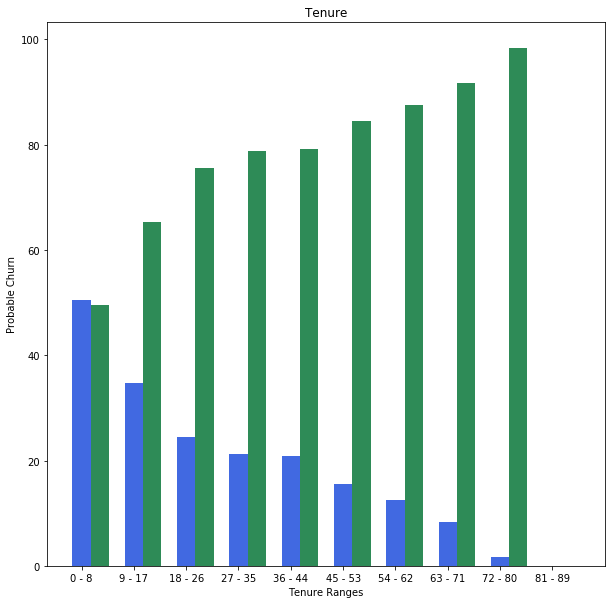

In [51]:
width = 0.35
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(len(ranges)), yes_p, width, color='royalblue')
rects2 = ax.bar(np.arange(len(ranges))+width, no_p, width, color='seagreen')

# add some
ax.set_xlabel('Tenure Ranges')
ax.set_ylabel('Probable Churn')
ax.set_title('Tenure')
ax.set_xticks(range(len(yes_p)))
ax.set_xticklabels(ranges)

fig.savefig("Tenure.png")
plt.show()

In [53]:
(ranges,yes_p,no_p) = func(a2,y1,10,0)

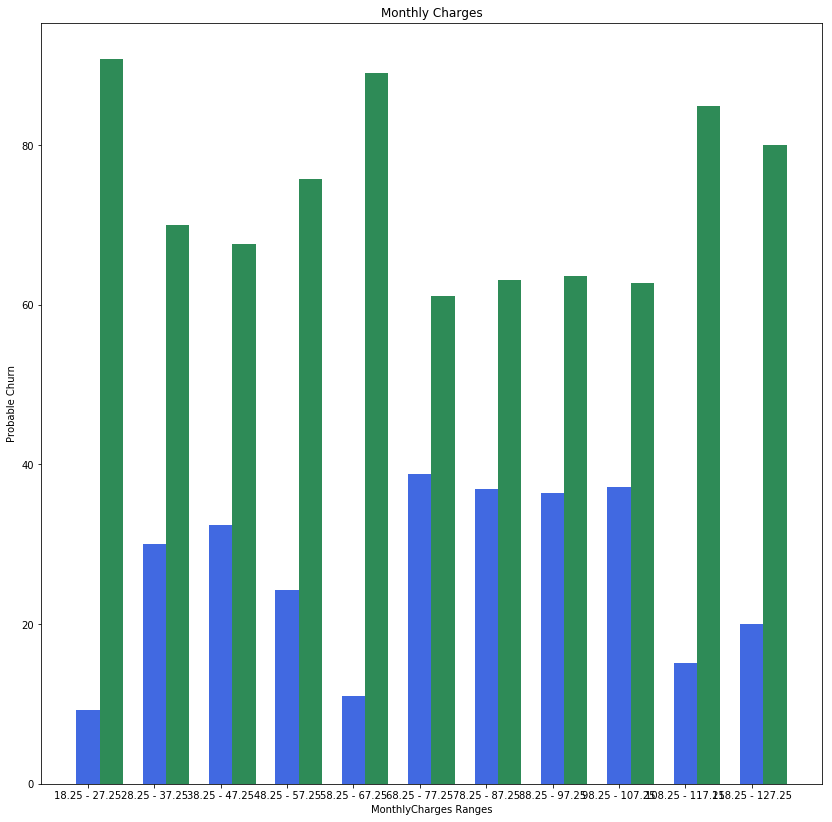

In [54]:
width = 0.35
fig=plt.figure(figsize=(14,14))
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(len(ranges)), yes_p, width, color='royalblue')
rects2 = ax.bar(np.arange(len(ranges))+width, no_p, width, color='seagreen')

# add some
ax.set_xlabel('MonthlyCharges Ranges')
ax.set_ylabel('Probable Churn')
ax.set_title('Monthly Charges')
ax.set_xticks(range(len(yes_p)))
ax.set_xticklabels(ranges)

fig.savefig("monthly_charges.png")
plt.show()

In [55]:
(ranges,yes_p,no_p) = func(a3,y1,10,653)

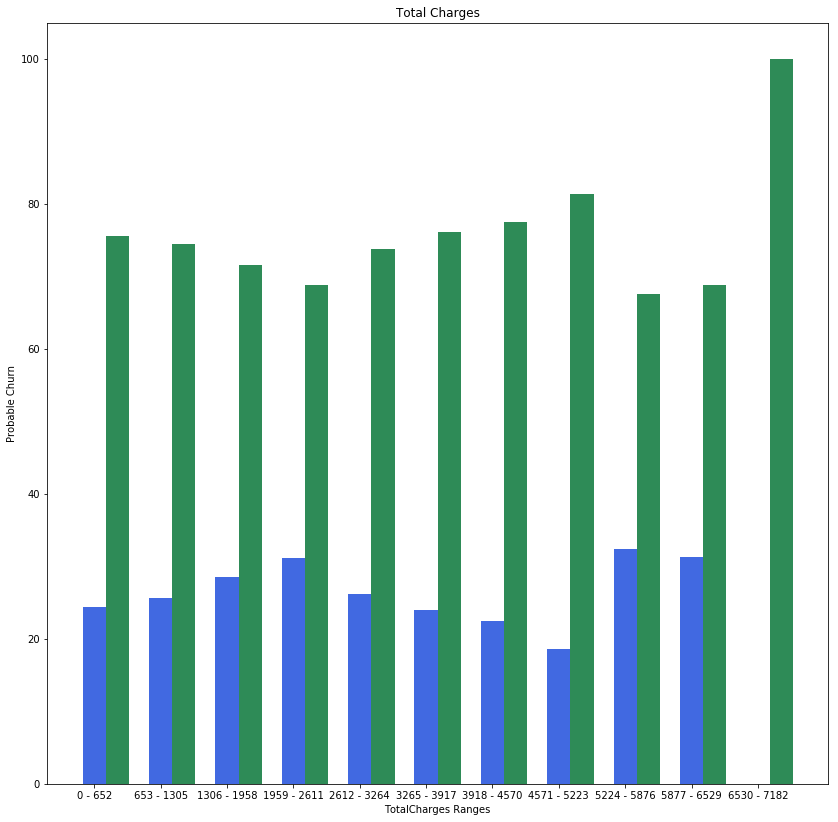

In [56]:
width = 0.35
fig=plt.figure(figsize=(14,14))
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(len(ranges)), yes_p, width, color='royalblue')
rects2 = ax.bar(np.arange(len(ranges))+width, no_p, width, color='seagreen')

# add some
ax.set_xlabel('TotalCharges Ranges')
ax.set_ylabel('Probable Churn')
ax.set_title('Total Charges')
ax.set_xticks(range(len(yes_p)))
ax.set_xticklabels(ranges)

fig.savefig("total_charges.png")
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
abc = clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))
feature_importances = pd.DataFrame(clf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

0.794180269694819
                  importance
MonthlyCharges      0.175400
tenure              0.174071
TotalCharges        0.161717
Contract            0.088665
PaymentMethod       0.053016
TechSupport         0.043239
OnlineSecurity      0.041405
OnlineBackup        0.031300
gender              0.027790
InternetService     0.025843
PaperlessBilling    0.024289
MultipleLines       0.024219
Partner             0.023553
DeviceProtection    0.023450
SeniorCitizen       0.021591
Dependents          0.019914
StreamingTV         0.017786
StreamingMovies     0.017448
PhoneService        0.005303


In [58]:
fimp = feature_importances

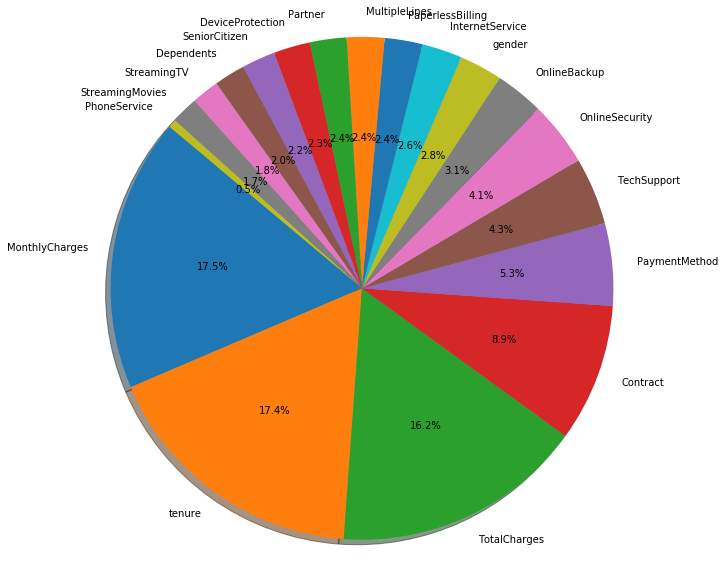

In [59]:
fig = plt.figure(figsize=(10,10))
plt.subplot()
labels = fimp.index.tolist()
yvalues = (fimp['importance']*100).tolist()
plt.pie(yvalues,labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
fig.savefig("impFeature.png")
plt.show()